<a href="https://colab.research.google.com/github/willianmh/mc886/blob/master/mc886_2018_trabalho2" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
! mkdir -p drive/My\ Drive/mc886
! mkdir -p drive/My\ Drive/mc886/trabalho2
! cp -r *.csv drive/My\ Drive/mc886/trabalho2

In [ ]:
!rm -rf /content/drive/


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


# Download data

Inicialmente estamos fazendo o download do dataset pelo kaggle

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
type(train_images)

numpy.ndarray

Definimos as classe na ordem indicada

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

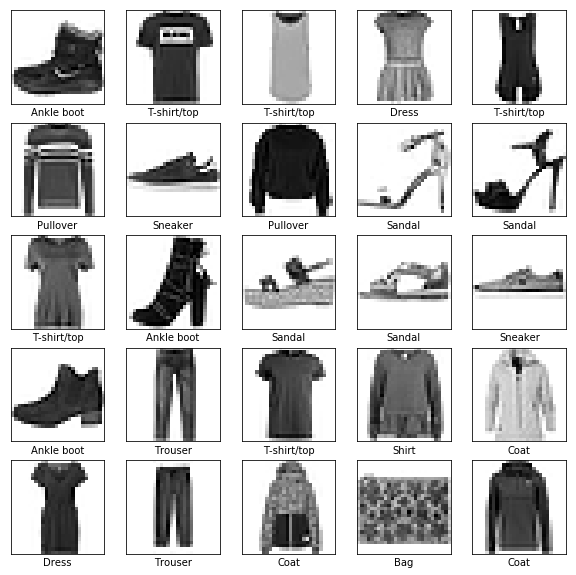

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Preprocess the data

normalize data

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

transform images into vectors

In [ ]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

## one-hot enconding the labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
train_labels_onehot = encoder.fit_transform(train_labels.reshape(-1, 1))
train_labels_onehot = train_labels_onehot.toarray()

encoder = OneHotEncoder()
test_labels_onehot = encoder.fit_transform(test_labels.reshape(-1, 1))
test_labels_onehot = test_labels_onehot.toarray()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [ ]:
test_labels_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_labels.shape

(10000,)

In [ ]:
X_train = train_images
Y_train = train_labels

X_test = test_images
Y_test = test_labels

# Auxiliar functions

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    

## Softmax and cost

In [ ]:
def softmax(x):
  """
  :param x: k, m
  """
  exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
  return exp_x / np.sum(exp_x, axis=0, keepdims=True)

def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2 + 1e-15), Y)
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost

def delta_ReLU(x):
  return (x > 0) * 1


## Optimizer

In [ ]:
def inicialize_momentum(W, b):
  vd = {}
  for i in range(1, len(W)+1):
    vd['dw' + str(i)] = np.zeros(W[i].shape)
    vd['db' + str(i)] = np.zeros(b[i].shape)
  
  return vd

def momentum(vd, grads, beta=0.9):
  # unpack
  dW = grads['dW']
  db = grads['db']
  
  for i in range(1, len(dW) + 1):
    vd['dw' + str(i)] = beta * vd['dw' + str(i)] + (1 - beta) * dW[i]
    vd['db' + str(i)] = beta * vd['db' + str(i)] + (1 - beta) * db[i]
  
  return vd

def RMSprop(sd, grads, beta=0.9):
  # unpack
  dW = grads['dW']
  db = grads['db']
  
  for i in range(1, len(dW) + 1):
    sd['dw' + str(i)] = beta * sd['dw' + str(i)] + (1 - beta) * (dW[i]**2)
    sd['db' + str(i)] = beta * sd['db' + str(i)] + (1 - beta) * (db[i]**2)
  return sd

def bias_correction(vd, t, beta):
  cvd ={}
  for i in range(1, len(vd)//2+1):
    cvd['dw' + str(i)] = vd['dw' + str(i)] / (1. - beta**t + 1e-15)
    cvd['db' + str(i)] = vd['db' + str(i)] / (1. - beta**t + 1e-15) 
    
  return cvd

# Logistic Regression

In [ ]:
from sklearn.utils import shuffle


def LR_model(X, Y, W, b, n_epochs=50, beta=0.9, alpha=0.25, lambd=0.1):
  
  n = X.shape[0]
  m = X.shape[1]
  
  vdW = np.zeros(W.shape)
  vdb = np.zeros(b.shape)
  
  costs = []
  
  for epoch in range(n_epochs):     
    J = 0
    for i in range(100):
      
      xi = X[:, i*(m//100):(i+1)*(m//100)].reshape((n, m//100)) # n, 500
      yi = Y[i*(m//100):(i+1)*(m//100)].reshape((1, m//100)) # 1, 500
      # xi = X[:, i].reshape((n,1))
      # yi = Y[i].reshape((1,1))
      
      zi = np.dot(W, xi) + b # 1, 500
      ai = 1 / (1 + np.exp(-zi)) # 1, 500
      
      # J += -(yi * np.log(1e-15 + ai) + (1 - yi)*np.log(1e-15 + 1 - ai))
      
      # gradient
      dzi = ai - yi # 1, 500
      dW = (1.0 / m) * np.dot(dzi, xi.T) + (lambd / m) * W # 1, n
      db = (1.0 / m) * np.sum(dzi, axis=1, keepdims=True)

      # alpha = 1.0 / (100 + m * (epoch/10 + 1) + i)
      if epoch > n_epochs * 0.8:
        alpha = 0.01
      elif epoch > n_epochs * 0.6:
        alpha = 0.05
      elif epoch > n_epochs * 0.5:
        alpha = 0.1
      
      
      W = W - alpha * dW
      b = b - alpha * db
      
    #calculate the cost function
    aux = np.sum(np.square(W))
    reg_cost = aux * lambd / (2 * m)
    
    #calculate loss
    cost = compute_cost(ai, yi) + reg_cost
    costs.append(cost)
    
    if epoch % 20 == 0:      
      print("Epoch %i:\tloss: %f" % (epoch, cost))
#   print(W.shape, b.shape, cost.shape)
  return W, b



In [ ]:
def predict_LR(X, W, b):
  zi = np.dot(W, X) + b
  
  ai = 1 / (1 + np.exp(-zi))
  
  predict = np.argmax(ai, axis=0)
  
  return predict 

## Train model and validate with k-fold

In [ ]:
folds = 1
n_epochs = 200

alpha = 0.25
lambd = 0.1

W = np.random.rand(10, train_images.shape[1]) * 0.0001
# b = np.random.rand(10)
# W = np.zeros(shape=(10, train_images.shape[1]))
b = np.zeros(shape=(10, 1))

mean_W = np.zeros((10, train_images.shape[1]))
mean_b = b = np.zeros(shape=(10, 1))

# cost = np.zeros((10, n_epochs))
accuracy_LR = []
best_accuracy = 0.0

In [ ]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split*10000
  v = (index_split+1)*10000
  
  X_train = np.append(train_images[0:u], train_images[v:60000], axis=0)
  X_validation = train_images[u:v]
  Y_validation = train_labels[u:v]
  
  # train model
  starter_time = time.time()
  for i in range(10):
    print("** class %i **" % i)
    Y_train = np.append(train_labels_onehot[0:u,i], train_labels_onehot[v:60000,i], axis=0)
    W[i], b[i] = LR_model(X_train.T, 
                          Y_train.T, 
                          W[i].reshape(1, 784), 
                          b[i].reshape(1), 
                          n_epochs=n_epochs, 
                          alpha=alpha, 
                          lambd=lambd
                         )
  time_LR = time.time() - starter_time
  
  # validate model
  Y_predicted = predict_LR(X_validation.T, W, b)  
  
  n_correct = sum(Y_validation == Y_predicted)
  accuracy_LR.append(float(n_correct) / len(Y_predicted))
  # update best model
  if accuracy_LR[index_split] > best_accuracy:
    best_accuracy = accuracy_LR[index_split]
    LR_W_best = W.copy()
    LR_b_best = b.copy()
  
  mean_W = mean_W + W
  mean_b = mean_b + b

mean_W = mean_W / folds
mean_b = mean_b / folds
print(time_LR)

fold: 0 
** class 0 **
Epoch 0:	loss: 0.174221
Epoch 20:	loss: 0.065221
Epoch 40:	loss: 0.055843
Epoch 60:	loss: 0.052341
Epoch 80:	loss: 0.050482
Epoch 100:	loss: 0.049318
Epoch 120:	loss: 0.049132
Epoch 140:	loss: 0.049025
Epoch 160:	loss: 0.048874
Epoch 180:	loss: 0.048867
** class 1 **
Epoch 0:	loss: 0.149071
Epoch 20:	loss: 0.040827
Epoch 40:	loss: 0.031784
Epoch 60:	loss: 0.027597
Epoch 80:	loss: 0.025010
Epoch 100:	loss: 0.023192
Epoch 120:	loss: 0.022594
Epoch 140:	loss: 0.022319
Epoch 160:	loss: 0.022057
Epoch 180:	loss: 0.022006
** class 2 **
Epoch 0:	loss: 0.234538
Epoch 20:	loss: 0.150770
Epoch 40:	loss: 0.145692
Epoch 60:	loss: 0.141525
Epoch 80:	loss: 0.137737
Epoch 100:	loss: 0.134398
Epoch 120:	loss: 0.133512
Epoch 140:	loss: 0.133074
Epoch 160:	loss: 0.132504
Epoch 180:	loss: 0.132491
** class 3 **
Epoch 0:	loss: 0.137597
Epoch 20:	loss: 0.074630
Epoch 40:	loss: 0.065886
Epoch 60:	loss: 0.062455
Epoch 80:	loss: 0.060730
Epoch 100:	loss: 0.059740
Epoch 120:	loss: 0.0593

In [ ]:
b.shape

(10, 1)

In [ ]:
# LR_W_best
LR_W_mean = mean_W.copy()
LR_W_last = W.copy()

LR_b_mean = mean_b.copy()
LR_b_last = b.copy()

In [ ]:
np.savetxt("LR_W_mean.csv", LR_W_mean, delimiter=",")
np.savetxt("LR_W_last.csv", LR_W_last, delimiter=",")
np.savetxt("LR_W_best.csv", LR_W_best, delimiter=",")

np.savetxt("LR_b_mean.csv", LR_b_mean, delimiter=",")
np.savetxt("LR_b_last.csv", LR_b_last, delimiter=",")
np.savetxt("LR_b_best.csv", LR_b_best, delimiter=",")

In [ ]:
X_train = train_images #60000, 784

Y_train = train_labels # 60000, 
# LR_W_best, LR_W_mean & LR_W_last
Y_predicted = predict_LR(X_validation.T, LR_W_best, LR_b_best.reshape(10,1)) # 60000,
n_correct = sum(Y_validation == Y_predicted)

cm =confusion_matrix(Y_validation, Y_predicted)


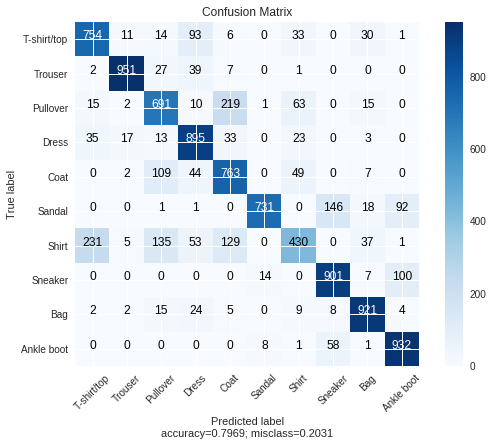

In [ ]:
plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")


## Softmax Regression

In [ ]:
def predict_MLR(X, W, b):
  """
  :param X: data           (no features, no examples)
  :param W: weights        (no classes, no features)
  :param b: bias           (no classes, 1)
  :return:
  """
  # Y: k, m
  y_pred = np.argmax(softmax(np.dot(W, X) + b), axis=0)
  return y_pred


def propagate(X, Y, W, b, lambd):
  """
  :param X: data           (no featurs, no examples)
  :param Y: one hot labels (no classes, no examples)
  :param W: weights        (no classes, no features)
  :param b: bias           (no classes, 1)
  :return:
  """

  # X: n, m
  # Y: k, m
  m = X.shape[1]  # getting no of rows

  # Forward Prop
  A = softmax(np.dot(W, X) + b) # shape: k, m

  cost = (-1.0 / m) * np.sum(Y * np.log(1e-15 + A))
 
  # backwar prop
  dZ = A - Y # shape: k, m
  dw = (1.0 / m) * np.dot(dZ, X.T) + (lambd / m) * W # k, n
  db = (1.0 / m) * np.sum(dZ, axis=1, keepdims=True)
  cost = np.squeeze(cost)
  grads = {"dw": dw,
           "db": db}
  return grads, cost, np.argmax(A, axis=0)


def MR_model(X, Y, W, b, n_epochs, alpha, lambd=0.1, beta=0.9):
    """
    :param X: data           (no features, no examples)
    :param Y: one hot labels (no classes, no examples)
    :param W: weights        (no classes, no features)
    :param b: bias           (no classes, 1)
    :param n_epochs: number of iterations for gradient
    :param alpha:
    :return:
    """
    
    n = X.shape[0]  # getting no of rows
    m = X.shape[1]  # getting no of rows

    vdw = np.zeros(W.shape)
    vdb = np.zeros(b.shape)
    
    costs = []
    for epoch in range(n_epochs):
      for i in range(100):
        
        xi = X[:, i*(m//100):(i+1)*(m//100)].reshape((n, m//100)) # n, 500
        yi = Y[:, i*(m//100):(i+1)*(m//100)].reshape((10, m//100)) # 1, 500
      
      
        grads, cost, A = propagate(xi, yi, W, b, lambd)
        dw = grads["dw"]
        db = grads["db"]
        
        vdw = beta * vdw + (1 - beta) * dw
        vdb = beta * vdb + (1 - beta) * db
        
        W = W - alpha * vdw
        b = b - alpha * vdb
        
        alpha = alpha * 0.99

        cost += np.sum(np.square(W)) * lambd / (2 * m)
        costs.append(cost)

      if epoch % 50 == 0:
        n_correct = np.sum(np.argmax(yi, axis=0) == A)
        accuracy = float(n_correct) / len(A)  
        
        
        print("Epoch %i:\tloss: %f\tacc: %f" % (epoch, cost, accuracy))

    return W, b, costs





# aux = 0.0
#       for i in range(1, l + 1):
#         aux = aux + np.sum(np.square(W[i]))
#       reg_cost = aux * lambd / (2 * m)
#       #calculate loss
#       cost = compute_cost(forward_cache['A'][3], yi) + reg_cost
#       costs.append(cost)
      
      
#       Y_predictions = np.argmax(forward_cache['A'][3], axis=0)
#       n_correct = np.sum(np.argmax(yi, axis=0) == Y_predictions)
#       accuracy = float(n_correct) / len(Y_predictions)    
      
      

Inicialize parameters to the train model

In [ ]:
n_epochs = 350
folds = 1

# W = np.random.randn(10, train_images.shape[1]) * 0.00001
# b = np.random.randn(1 ,10)
W = np.zeros(shape=(10, train_images.shape[1]))
b = np.zeros(shape=(10, 1))

MLR_W_mean = np.zeros((10, train_images.shape[1]))
MLR_b_mean = np.zeros(shape=(10, 1))

MLR_costs = []

MLR_accuracy = []
best_accuracy = 0.0


In [ ]:
b.shape

(10, 1)

perform k-fold

In [ ]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split * 10000
  v = (index_split + 1) * 10000
  # Separate set
  X_train = np.append(train_images[0:u], train_images[v:60000], axis=0)  # shape: m, n
  Y_train = np.append(train_labels_onehot[0:u], train_labels_onehot[v:60000], axis=0)  # shape: m, k
  X_validation = train_images[u:v]
  Y_validation = train_labels[u:v]
  
  # train model
  starter_time = time.time()
  W, b, cost = MR_model(X_train.T, Y_train.T, W, b, n_epochs, alpha=0.25, lambd=0.1, beta=0.88)
  time_MLR = time.time() - starter_time
  
  # validate model
  Y_predicted = predict_MLR(X_validation.T, W, b)
  n_correct = sum(Y_validation == Y_predicted)
  
  MLR_costs.append(cost)
  MLR_accuracy.append(float(n_correct) / len(Y_predicted))
  
  if MLR_accuracy[index_split] > best_accuracy:
    best_accuracy = MLR_accuracy[index_split]
    MLR_W_best = W.copy()
    MLR_b_best = b.copy()

  MLR_W_mean = MLR_W_mean + W
  MLR_b_mean = MLR_b_mean + b
  
MLR_W_mean = MLR_W_mean / folds
MLR_b_mean = MLR_b_mean / folds
  
    
print(time_MLR)

fold: 0 
Epoch 0:	loss: 0.623956	acc: 0.792000
Epoch 50:	loss: 0.568658	acc: 0.814000
Epoch 100:	loss: 0.568658	acc: 0.814000
Epoch 150:	loss: 0.568658	acc: 0.814000
Epoch 200:	loss: 0.568658	acc: 0.814000
Epoch 250:	loss: 0.568658	acc: 0.814000
Epoch 300:	loss: 0.568658	acc: 0.814000
117.10932731628418


[0.8081]


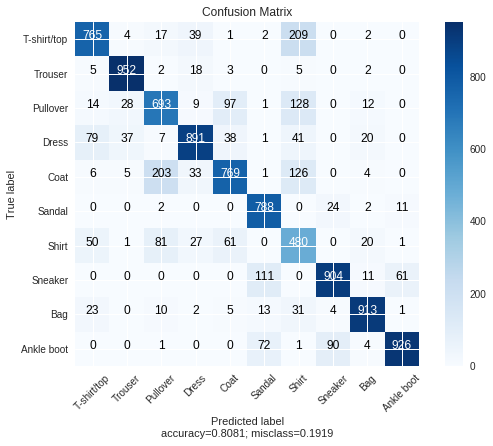

In [ ]:
print(MLR_accuracy)
# print(time_MLR)
Y_predicted = predict_MLR(X_validation.T, MLR_W_best, MLR_b_best)

cm =confusion_matrix(Y_predicted, Y_validation)

plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")


In [ ]:
# LR_W_best
MLR_W_last = W.copy()
MLR_b_last = b.copy()

np.savetxt("MLR_W_mean.csv", MLR_W_mean, delimiter=",")
np.savetxt("MLR_W_last.csv", MLR_W_last, delimiter=",")
np.savetxt("MLR_W_best.csv", MLR_W_best, delimiter=",")

np.savetxt("MLR_b_mean.csv", MLR_b_mean, delimiter=",")
np.savetxt("MLR_b_last.csv", MLR_b_last, delimiter=",")
np.savetxt("MLR_b_best.csv", MLR_b_best, delimiter=",")


In [ ]:
def multinomialSGD(X, Y, W, b, n_epochs=50, lambd=0.08, beta=0.87):
  """
  :param X: data           (no features, no examples)
  :param Y: one hot labels (no classes, no examples)
  :param W: weights        (no classes, no features)
  :param b: bias           (no classes, 1)
  :param n_epochs: number of iterations for gradient
  :param alpha:
  :return:
  """
  n = X.shape[0]
  m = X.shape[1]
  k = 10
  
  # X: n, m
  # Y: k ,m
  
  cost = np.zeros(n_epochs)    
  for epoch in range(n_epochs):     
    J = 0.0
    for i in range(m):
      xi = X[:, i].reshape((n,1)) # n, 1
      yi = Y[:, i].reshape((k, 1)) # shape: k, 1
      
      # forward prop
      zi = np.dot(W, xi) + b # shape = k, 1
      pk = softmax(zi) # shape = k, 1
      # loss
      J += np.sum(-yi * np.log(1e-15 + pk))
      # derivatives 
      dzi = pk - yi # shape: k, 1  
      dW = np.dot(dzi, xi.T) + (lambd / m) * W # shape: k, n
      
      alpha = 1.0 / (100.0 + m * (epoch/10 + 1) + i)
      
      W = W - alpha * dW
      b = b - alpha * dzi
    
    cost[epoch] = (J / m) + np.sum(np.square(W)) * lambd / (2 * m)
    if epoch % 10  == 0:
      print("Cost after epoch %i: %f" % (epoch, cost[epoch]))
  return W, b, cost 

In [ ]:
n_epochs = 50

folds = 6
W = 0.0025 * np.random.randn(10, train_images.shape[1])
b = np.zeros(shape=(10, 1))

SGD_MLR_W_mean = np.zeros((10, train_images.shape[1]))
SGD_MLR_b_mean = np.zeros(shape=(10, 1))

SGD_MLR_costs = []

SGD_MLR_accuracy = []
best_accuracy = 0.0 

In [ ]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split * 10000
  v = (index_split + 1) * 10000

  X_train = np.append(train_images[0:u], train_images[v:60000], axis=0)  # shape: m, n
  Y_train = np.append(train_labels_onehot[0:u], train_labels_onehot[v:60000], axis=0)  # shape: m, k
  Y_labels = np.append(train_labels[0:u], train_labels[v:60000], axis=0)  # shape: m, k
  X_validation = train_images[u:v]
  Y_validation = train_labels[u:v]
  # train model
  starter_time = time.time()
  W, b, costs = multinomialSGD(X_train.T, Y_train.T, W, b, n_epochs)
  time_SGD = time.time() - starter_time
  # validate
  Y_predicted = predict_MLR(X_validation.T, W, b)
  
  n_correct = sum(Y_validation == Y_predicted)
  SGD_MLR_costs.append(cost)
  SGD_MLR_accuracy.append(float(n_correct) / len(Y_predicted))
  # update best model
  if SGD_MLR_accuracy[index_split] > best_accuracy:
    best_accuracy = SGD_MLR_accuracy[index_split]
    SGD_MLR_W_best = W.copy()
    SGD_MLR_b_best = b.copy()

  SGD_MLR_W_mean = SGD_MLR_W_mean + W
  SGD_MLR_b_mean = SGD_MLR_b_mean + b

SGD_MLR_W_mean = SGD_MLR_W_mean / folds
SGD_MLR_b_mean = SGD_MLR_b_mean / folds

    
print(time_SGD)

fold: 0 
Cost after epoch 0: 1.750392
Cost after epoch 10: 0.809282
Cost after epoch 20: 0.726259
Cost after epoch 30: 0.688842
Cost after epoch 40: 0.666374
fold: 1 
Cost after epoch 0: 0.648697
Cost after epoch 10: 0.613627
Cost after epoch 20: 0.596804
Cost after epoch 30: 0.586291
Cost after epoch 40: 0.578859
fold: 2 
Cost after epoch 0: 0.572330
Cost after epoch 10: 0.557348
Cost after epoch 20: 0.549183
Cost after epoch 30: 0.543737
Cost after epoch 40: 0.539723
fold: 3 
Cost after epoch 0: 0.538125
Cost after epoch 10: 0.529114
Cost after epoch 20: 0.523962
Cost after epoch 30: 0.520427
Cost after epoch 40: 0.517769
fold: 4 
Cost after epoch 0: 0.515502
Cost after epoch 10: 0.509347
Cost after epoch 20: 0.505719
Cost after epoch 30: 0.503186
Cost after epoch 40: 0.501257
fold: 5 
Cost after epoch 0: 0.498633
Cost after epoch 10: 0.494058
Cost after epoch 20: 0.491328
Cost after epoch 30: 0.489405
Cost after epoch 40: 0.487932
211.69581532478333


[0.7955, 0.8112, 0.8253, 0.8369, 0.8381, 0.831]


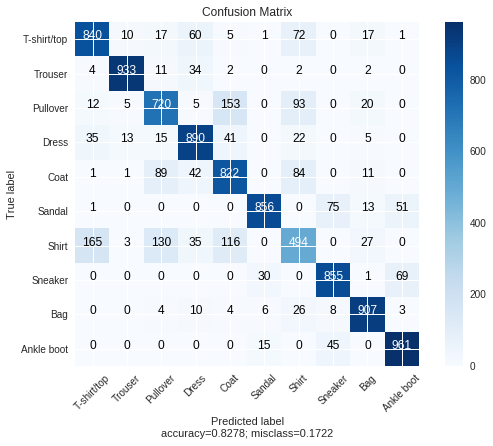

In [ ]:
# LR_W_best
SGD_MLR_W_last = W.copy()
SGD_MLR_b_last = b.copy()

np.savetxt("SGD_MLR_W_mean.csv", SGD_MLR_W_mean, delimiter=",")
np.savetxt("SGD_MLR_W_last.csv", SGD_MLR_W_last, delimiter=",")
np.savetxt("SGD_MLR_W_best.csv", SGD_MLR_W_best, delimiter=",")

np.savetxt("SGD_MLR_b_mean.csv", SGD_MLR_b_mean, delimiter=",")
np.savetxt("SGD_MLR_b_last.csv", SGD_MLR_b_last, delimiter=",")
np.savetxt("SGD_MLR_b_best.csv", SGD_MLR_b_best, delimiter=",")


# Neural Network - 1 hidden layer

In [ ]:
# hidden layer: tanh
# output layer: softmax

def forwardprop(X, W, b):
  # Forward prop
  Z = {}
  A = {}
  # ReLU
  # n1, n * n, m
  Z[1] = np.dot(W[1], X) + b[1] # n1, m
  A[1] = Z[1] * (Z[1] > 0)
#   A[0] = np.tanh(Z[0])
  Z[2] = np.dot(W[2], A[1]) + b[2] # n2, m
  A[2] = softmax(Z[2])
  
  return A, Z
  
def backprop(X, Y, W, b, A, Z, lambd=0.1):
  m = X.shape[1]
  dZ = {}
  dW = {}
  db = {}
  
  dZ[2] = A[2] - Y # n2, m  
  dW[2] = (1.0/m) * np.dot(dZ[2], A[1].T) + (lambd / m) * W[2]  # n2, n1
  db[2] = (1.0/m) * np.sum(dZ[2], axis=1, keepdims=True)
  
  #   dZ[0] = np.multiply(np.dot(W[1].T, dZ[1]),1 - np.square(A[0])) # n1, m
  dZ[1] = np.multiply(np.dot(W[2].T, dZ[2]),delta_ReLU(Z[1])) # n1, m
  dW[1] = (1.0/m) * np.dot(dZ[1], X.T) + (lambd / m) * W[1]  # n1, n
  db[1] = (1.0/m) * np.sum(dZ[1], axis=1, keepdims=True)
  
  grads = {
      'dW' : dW,
      'db' : db
  }
  
  return grads
  
def nn_one_layer(X, Y, W, b, n_epochs=50, alpha=0.01, lambd=0.1, beta=0.9):
  m = X.shape[1]  # getting no of rows
  l = len(W)
  costs = []
  
  vd = inicialize_momentum(W, b)
  
  for epoch in range(n_epochs):
    A, Z = forwardprop(X, W, b)
  
    grads = backprop(X, Y, W, b, A, Z)
    
    if epoch > n_epochs * 0.8:
      alpha = alpha * 0.5
    elif epoch > n_epochs * 0.6:
      alpha = alpha * 0.5
    elif epoch > n_epochs * 0.4:
      alpha = alpha * 0.9
    
    vd = momentum(vd, grads, beta)

    W[1] = W[1] - alpha * vd['dw1']
    b[1] = b[1] - alpha * vd['db1']
    W[2] = W[2] - alpha * vd['dw2']
    b[2] = b[2] - alpha * vd['db2']
    
    if epoch % 10 == 0:
      aux = 0.0
      for i in range(1, l + 1):
        aux = aux + np.sum(np.square(W[i]))
      reg_cost = aux * lambd / (2 * m)
      
      cost = compute_cost(A[2], Y)
      costs.append(cost)
      
      Y_predictions = np.argmax(A[2], axis=0)
      n_correct = np.sum(np.argmax(Y, axis=0) == Y_predictions)
      accuracy = float(n_correct) / len(Y_predictions)    
      
      print("Epoch %i:\tloss: %f\tacc: %f" % (epoch, cost, accuracy))
  return W, b, costs
            
            

In [ ]:
def predict_nn(X, W, b):
    A, Z = forwardprop(X, W, b)
    predictions = np.argmax(A[2], axis=0)
    return predictions

In [ ]:
n_epochs = 150

folds = 1
# no of neurons on hidden layer
n1 = 400


W = []
b = []
np.random.seed(5)

W = {
    1: np.random.randn(n1, train_images.shape[1]) * np.sqrt(2/784),
    2: np.random.randn(10, n1) * np.sqrt(1/n1)
}
b = {
    1: np.zeros((n1, 1)),
    2: np.zeros((10, 1))
}

nn_costs = np.zeros((10, n_epochs))

nn_accuracy = []
best_accuracy = 0.0

In [ ]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split * 10000
  v = (index_split + 1) * 10000

  X_train = np.append(train_images[0:u], train_images[v:60000], axis=0)  # shape: m, n
  Y_train = np.append(train_labels_onehot[0:u], train_labels_onehot[v:60000], axis=0)  # shape: m, k
  Y_labels = np.append(train_labels[0:u], train_labels[v:60000], axis=0)  # shape: m, k
  X_validation = train_images[u:v]
  Y_validation = train_labels[u:v]
  
  starter_time = time.time()
  W, b, costs = nn_one_layer(X_train.T, Y_train.T, W, b, n_epochs, alpha=0.25)
  time_nn = time.time() - starter_time

  Y_predicted = predict_nn(X_validation.T, W, b)

  n_correct = sum(Y_validation == Y_predicted)
  accuracy = float(n_correct) / len(Y_predicted)
  print("Accuracy: %f" % accuracy)

  # if accuracy_softmaxRegression[index_split] > best_accuracy:
  #     best_accuracy = accuracy_softmaxRegression[index_split]
  #     best_W_softmaxRegression = w
  #
  # mean_W_softmaxRegression = mean_W_softmaxRegression + W

print(time_nn)

fold: 0 
Epoch 0:	loss: 2.355620	acc: 0.096740
Epoch 10:	loss: 1.270356	acc: 0.626640


KeyboardInterrupt: ignored

0.7947


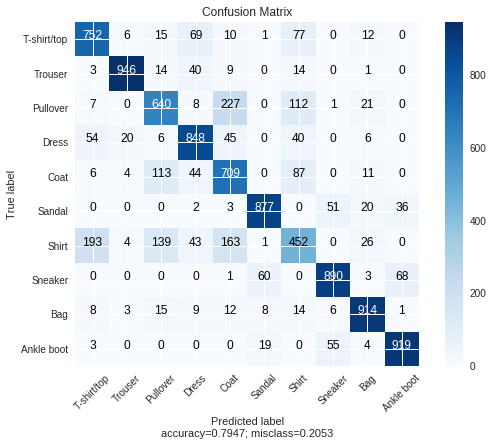

In [ ]:
Y_predicted = predict_nn(X_validation.T, W,b)
n_correct = sum(Y_validation == Y_predicted)
accuracy = float(n_correct) / len(Y_predicted)
print(accuracy)

cm = confusion_matrix(Y_validation, Y_predicted)
plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

In [ ]:
np.savetxt("2_nn_W1.csv", W[0], delimiter=",")
np.savetxt("2_nn_W2.csv", W[1], delimiter=",")

np.savetxt("2_nn_b1.csv", b[0], delimiter=",")
np.savetxt("2_nn_b2.csv", b[1], delimiter=",")




In [ ]:
X_debug = np.append([train_images[1],train_images[16], train_images[7], train_images[3], train_images[19], train_images[8], train_images[18], train_images[6], train_images[23]], [train_images[0]], axis=0)
X_debug.shape

(10, 784)

In [ ]:
Y_debug = np.append([train_labels[1],train_labels[16], train_labels[7], train_labels[3], train_labels[19], train_labels[8], train_labels[18], train_labels[6], train_labels[23]],[train_labels[0]], axis=0)
Y_debug_onehot = np.append([train_labels_onehot[1], train_labels_onehot[16], train_labels_onehot[7], train_labels_onehot[3], train_labels_onehot[19], train_labels_onehot[8], train_labels_onehot[18], train_labels_onehot[6], train_labels_onehot[23]],[train_labels_onehot[0]], axis=0)
Y_debug_onehot.shape

(10, 10)

# Neural Network - 2 hidden layer


### train model

In [ ]:
# hidden layer: ReLU
# hidden layer: ReLU
# output layer: softmax



def forwardprop_two_layer(X, W, b):
  """
  param W: dict,
  param b: dict
  """
  # Forward prop
  Z = {}
  A = {}
  # ReLU
  A[0] = X
  for i in range(1, len(W)):
    Z[i] = np.dot(W[i], A[i - 1]) + b[i]
    A[i] = Z[i] * (Z[i] > 0)
  
  Z[len(W)] = np.dot(W[len(W)], A[len(W) - 1]) + b[len(W)] # n3, m
  A[len(W)] = softmax(Z[len(W)])

  forward_cache = {
      'A': A,
      'Z': Z
  }
  
  return forward_cache
  
def backprop_two_layer(X, Y, W, b, forward_cache, lambd=0.1):
  m = X.shape[1]
  
  # unpack
  A = forward_cache['A']
  Z = forward_cache['Z']
  
  A[0] = X
  # creating empty arrays
  dZ = {}
  dW = {}
  db = {}
  
  l = len(W)
  
  dZ[l] = A[l] - Y # k, m
  dW[l] = (1.0/m) * np.dot(dZ[l], A[l-1].T) + (lambd / m) * W[l] # k, n2
  db[l] = (1.0/m) * np.sum(dZ[l], axis=1, keepdims=True)
  
  for i in range(l-1, 0, -1):
    dZ[i] = np.multiply(np.dot(W[i+1].T, dZ[i+1]),delta_ReLU(Z[i]))
    db[i] = (1.0/m) * np.sum(dZ[i], axis=1, keepdims=True)
   
  grads = {
      'dW': dW,
      'db': db
  }
  return grads

def update_weights(W, b, updates, alpha=0.01):
  l = len(W)
  
  for i in range(1, l+1):
    W[i] = W[i] - alpha * updates['dw' + str(i)]
    b[i] = b[i] - alpha * updates['db' + str(i)]

    
def nn_two_layer_SGD(X, Y, W, b, n_epochs=50, alpha=0.01, lambd=0.1, beta1=0.9, beta2=0.999):
  n = X.shape[0]
  m = X.shape[1]
  batch = 100
  
  l = len(W)
  costs = []
  
  vd = inicialize_momentum(W, b)
  sd = inicialize_momentum(W, b)
  
  for epoch in range(n_epochs):
    for i in range(batch):
      xi = X[:, i*(m//batch):(i+1)*(m//batch)].reshape((n, m//batch)) # n, 100
      yi = Y[:, i*(m//batch):(i+1)*(m//batch)].reshape((10, m//batch)) # shape: k, 100
      # forward propagation
      forward_cache = forwardprop_two_layer(xi, W, b)
      # back propagation
      grads = backprop_two_layer(xi, yi, W, b, forward_cache, lambd)
      
      # learning rate
      if epoch == int(n_epochs * 0.8):
        alpha = alpha * 0.7
      elif epoch == int(n_epochs * 0.6):
        alpha = alpha * 0.9
      elif epoch == int(n_epochs * 0.5):
        alpha = alpha * 0.9
#       alpha = 1.0 / 1. + decay*epoch + i
#       alpha = alpha * 0.99
      
      dW = grads['dW']
      db = grads['db']
      
      for k in range(1, l+1):
        vd['dw' + str(k)] = beta1 * vd['dw' + str(k)] + (1. - beta1) * dW[k]
        vd['db' + str(k)] = beta1 * vd['db' + str(k)] + (1. - beta1) * db[k]
        
        sd['dw' + str(k)] = beta2 * sd['dw' + str(k)] + (1. - beta2) * (dW[k]**2)
        sd['db' + str(k)] = beta2 * sd['db' + str(k)] + (1. - beta2) * (db[k]**2)
        
        vdw_corrected = vd['dw' + str(k)] / (1.05 - beta1**i) 
        vdb_corrected = vd['db' + str(k)] / (1.05 - beta1**i)   
        sdw_corrected = sd['dw' + str(k)] / (1.05 - beta2**i) 
        sdb_corrected = sd['db' + str(k)] / (1.05 - beta2**i)
        
#         W[k] = W[k] - alpha * vd['dw' + str(k)]
#         b[k] = b[k] - alpha * vd['db' + str(k)]
#         W[k] = W[k] - alpha * dW[k] / (np.sqrt(sdw_corrected + 1e-8))
#         b[k] = b[k] - alpha * db[k] / (np.sqrt(sdb_corrected + 1e-8))
        W[k] = W[k] - alpha * vdw_corrected / (np.sqrt(sdw_corrected)  + 0.1)
        b[k] = b[k] - alpha * vdb_corrected / (np.sqrt(sdb_corrected)  + 0.1)
      
      
      #update_weights(W, b, updates, alpha)

    if epoch % 1 == 0:
      aux = 0.0
      for i in range(1, l + 1):
        aux = aux + np.sum(np.square(W[i]))
      reg_cost = aux * lambd / (2 * m)
      #calculate loss
      cost = compute_cost(forward_cache['A'][l], yi) + reg_cost
      costs.append(cost)
      
      Y_predictions = np.argmax(forward_cache['A'][l], axis=0)
      n_correct = np.sum(np.argmax(yi, axis=0) == Y_predictions)
      accuracy = float(n_correct) / len(Y_predictions)    
      
      print("Epoch %i:\tloss: %f\tacc: %f" % (epoch, cost, accuracy))
  
  return W, b, costs

In [ ]:
n_epochs = 7
folds = 1
# no of neurons on hidden layer
n1 = 800
n2 = 800

epsilon = 0.1 # ini
lambd = 0.1   # regularization
beta = 0.9    # momentum


np.random.seed(2)

W = {
    1: np.random.randn(n1, train_images.shape[1]) * np.sqrt(2/784),
    2: np.random.randn(n2, n1) * np.sqrt(2/n1),
    3: np.random.randn(10, n2) * np.sqrt(1/n2)
}
b = {
    1: np.zeros((n1, 1)),
    2: np.zeros((n2, 1)),
    3: np.zeros((10, 1))
}

# * 2 * epsilon - epsilon
# W.insert(0, np.random.randn(n1, train_images.shape[1]) * np.sqrt(2/784)) 
# W.insert(1, np.random.randn(n2, n1) * np.sqrt(2/n1))
# W.insert(2, np.random.randn(10, n2) * np.sqrt(1/n2))
# b.insert(0, np.zeros((n1, 1)))
# b.insert(1, np.zeros((n2, 1)))
# b.insert(2, np.zeros((10, 1)))

nn_costs = np.zeros((10, n_epochs))

nn_accuracy = []
best_accuracy = 0.0

In [ ]:
def predict_nn_two_layer(X, W, b):
    forward_cache = forwardprop_two_layer(X, W, b)
    predictions = np.argmax(forward_cache['A'][len(W)], axis=0)
    return predictions

In [ ]:
n_epochs = 7
folds = 6
# no of neurons on hidden layer
n1 = 600
n2 = 600
n3 = 400
n4 = 200

epsilon = 0.1 # ini
lambd = 0.1   # regularization
beta = 0.9    # momentum


np.random.seed(2)

W = {
    1: np.random.randn(n1, train_images.shape[1]) * np.sqrt(2/784),
    2: np.random.randn(n2, n1) * np.sqrt(2/n1),
    3: np.random.randn(n3, n2) * np.sqrt(2/n2),
    4: np.random.randn(n4, n3) * np.sqrt(2/n3),
    5: np.random.randn(10, n4) * np.sqrt(1/n4)
}
b = {
    1: np.zeros((n1, 1)),
    2: np.zeros((n2, 1)),
    3: np.zeros((n3, 1)),
    4: np.zeros((n4, 1)),
    5: np.zeros((10, 1))
}

# * 2 * epsilon - epsilon
# W.insert(0, np.random.randn(n1, train_images.shape[1]) * np.sqrt(2/784)) 
# W.insert(1, np.random.randn(n2, n1) * np.sqrt(2/n1))
# W.insert(2, np.random.randn(10, n2) * np.sqrt(1/n2))
# b.insert(0, np.zeros((n1, 1)))
# b.insert(1, np.zeros((n2, 1)))
# b.insert(2, np.zeros((10, 1)))

nn_costs = np.zeros((10, n_epochs))

nn_accuracy = []
best_accuracy = 0.0

In [ ]:
W

{1: array([[-0.02104945, -0.0028419 , -0.1078942 , ..., -0.03115535,
          0.01622991, -0.04780279],
        [-0.02677608, -0.06359956,  0.08472877, ..., -0.01658795,
         -0.02840098,  0.00595554],
        [ 0.03730684, -0.08017053,  0.00773777, ..., -0.04257064,
          0.05071203,  0.00275687],
        ...,
        [ 0.03696181, -0.04095078,  0.00887599, ...,  0.00974166,
         -0.02854646,  0.06433439],
        [ 0.02493233, -0.04054444, -0.00649722, ...,  0.06855697,
         -0.04757403,  0.00327346],
        [ 0.0037094 , -0.05066613,  0.0792374 , ...,  0.01039198,
          0.08401261, -0.00231672]]),
 2: array([[-0.01937696, -0.03877242, -0.01567488, ...,  0.00715871,
          0.04118315, -0.0386459 ],
        [ 0.01872463,  0.00475015, -0.05887133, ...,  0.03870997,
         -0.01436582, -0.07516307],
        [ 0.04207227,  0.02288215, -0.08337428, ...,  0.04499156,
         -0.00907849,  0.0226347 ],
        ...,
        [-0.03248198, -0.00510601,  0.00592723, 

In [ ]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split * 10000
  v = (index_split + 1) * 10000

  X_train = np.append(train_images[0:u], train_images[v:60000], axis=0)  # shape: m, n
  Y_train = np.append(train_labels_onehot[0:u], train_labels_onehot[v:60000], axis=0)  # shape: m, k
  X_validation = train_images[u:v]
  Y_validation = train_labels[u:v]

#   X_train = X_debug
#   Y_train = Y_debug_onehot
  
  starter_time = time.time()
  W, b, costs = nn_two_layer_SGD(X_train.T, Y_train.T, W, b, n_epochs, alpha=0.05, beta1=0.9, beta2=0.999)
  time_nn = time.time() - starter_time

#   Y_predicted = predict_nn_two_layer(X_validation.T, W, b)

#   n_correct = sum(Y_validation == Y_predicted)
#   accuracy = float(n_correct) / len(Y_predicted)
#   print("Accuracy: %f" % accuracy)

print(time_nn)

nn_two_layer_W = W.copy()
nn_two_layer_b = b.copy()

fold: 0 


KeyError: ignored

0.8984


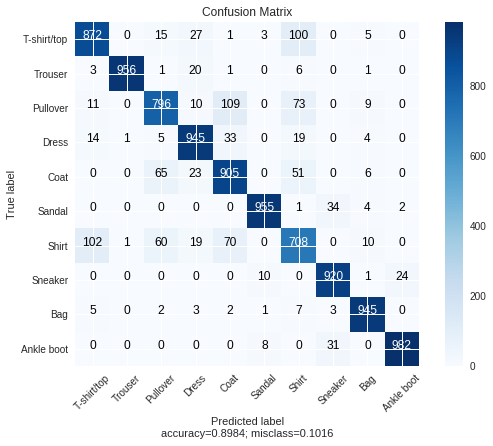

In [ ]:
Y_predicted = predict_nn(X_validation.T, nn_two_layer_W, nn_two_layer_b)
n_correct = sum(Y_validation == Y_predicted)
accuracy = float(n_correct) / len(Y_predicted)
print(accuracy)

cm = confusion_matrix(Y_validation, Y_predicted)


plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

In [ ]:
for i in range(1, len(nn_two_layer_W)+1):
  np.savetxt("adam_2nn_W" + str(i) + ".csv", nn_two_layer_W[i], delimiter=',')
  np.savetxt("adam_2nn_b" + str(i) + ".csv", nn_two_layer_b[i], delimiter=',')


# Test model

0.8736


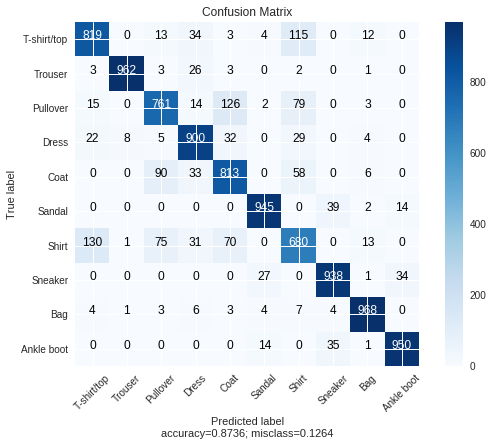

In [ ]:
Y_predicted = predict_nn_(test_images.T, nn_two_layer_W, nn_two_layer_b)
n_correct = sum(test_labels == Y_predicted)
accuracy = float(n_correct) / len(Y_predicted)
print(accuracy)

cm = confusion_matrix(test_labels, Y_predicted)


plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

# Backups

In [ ]:
# GRADIENT DESCENT

def nn_two_layer(X, Y, W, b, n_epochs=50, alpha=0.01, lambd=0.1):
  costs = []
  m = X.shape[1]
  
  for epoch in range(n_epochs):
    
    A, Z = forwardprop_two_layer(X, W, b)
    dW, db = backprop_two_layer(X, Y, W, b, A, Z, lambd)
    
    if epoch > n_epochs * 0.8:
      alpha = 0.01
    elif epoch > n_epochs * 0.6:
      alpha = 0.05
    elif epoch > n_epochs * 0.5:
      alpha = 0.1
    
    reg = (lambd * alpha) /  (2 * m)
  
    W[0] = W[0] - alpha * dW[0]
    b[0] = b[0] - alpha * db[0]
    W[1] = W[1] - alpha * dW[1]
    b[1] = b[1] - alpha * db[1]
    W[2] = W[2] - alpha * dW[2]
    b[2] = b[2] - alpha * db[2]
    
#     print("dW0:" + str(np.sum(dW[0]**2)) + "\tdW1:" + str(np.sum(dW[1]**2))+ "\tdW2:" + str(np.sum(dW[2]**2)))
#     print("W0:" + str(np.sum(W[0]**2)) + "\tW1:" + str(np.sum(W[1]**2))+ "\tW2:" + str(np.sum(W[2]**2)))
#     print("******************************")
    
    
    if epoch % 2 == 0:
      reg_cost = (np.sum(np.square(W[0])) + np.sum(np.square(W[1])) + np.sum(np.square(W[2]))) * lambd / (2 * m)
      cost = compute_cost(A[2], Y) + reg_cost
      costs.append(cost)
      
      predictions = np.argmax(A[2], axis=0)
      Y_label = np.argmax(Y, axis=0)
      
      n_correct = sum(Y_label == predictions)
      accuracy = float(n_correct) / len(predictions)
      print("Epoch %i:\tloss: %f\tacc: %f" % (epoch, cost, accuracy))
  
  return W, b, costs

In [ ]:
# BACKUP


# forward prop
#   Z[0] = np.dot(W['1'], X) + b['1'] # n1, m
#   A[0] = Z[0] * (Z[0] > 0)
#   A[0] = np.tanh(Z[0])
#   Z[1] = np.dot(W['2'], A[0]) + b['2'] # n2, m
#   A[1] = Z[1] * (Z[1] > 0)
#   A[1] = np.tanh(Z[1])

# back prop
#   dZ[1] = np.multiply(np.dot(W[2].T, dZ[2]),delta_ReLU(Z[1]))
#   dZ[1] = np.multiply(np.dot(W[2].T, dZ[2]),1 - np.square(A[1])) # n2, m  
#   dW[1] = (1.0/m) * np.dot(dZ[1], A[0].T) + (lambd / m) * W[1]# n2, n1
#   db[1] = (1.0/m) * np.sum(dZ[1], axis=1, keepdims=True)
#   dZ[0] = np.multiply(np.dot(W[1].T, dZ[1]),delta_ReLU(Z[0])) # n1, m
#   dZ[0] = np.multiply(np.dot(W[1].T, dZ[1]),1 - np.square(A[0])) # n1, m
#   dW[0] = (1.0/m) * np.dot(dZ[0], X.T) + (lambd / m) * W[0]# n1, n
#   db[0] = (1.0/m) * np.sum(dZ[0], axis=1, keepdims=True)

# momentum
#   vdw0 = vd['dw0']
#   vdw1 = vd['dw1']
#   vdw2 = vd['dw2']
#   vdb0 = vd['db0']
#   vdb1 = vd['db1']
#   vdb2 = vd['db2']
  
#   vd = {
#     "dw0": beta * vdw0 + (1 - beta) * dW[0],
#     "dw1" : beta * vdw1 + (1 - beta) * dW[1],
#     "dw2" : beta * vdw2 + (1 - beta) * dW[2],
#     "db0" : beta * vdb0 + (1 - beta) * db[0],
#     "db1" : beta * vdb1 + (1 - beta) * db[1],
#     "db2" : beta * vdb2 + (1 - beta) * db[2]
#   }